<a href="https://colab.research.google.com/github/GreeshmaHarids/FeynnLab_Project-2/blob/main/EV_Market_Segmentation_Using_State_and_Vehicle_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [282]:

# Load datasets
ev_state_data = pd.read_csv('electric_vehicle_sales_by_state.csv')
ev_makers_data = pd.read_csv('electric_vehicle_sales_by_makers.csv')
date_data = pd.read_csv('dim_date.csv')


In [283]:
# Create the category mapping DataFrame
category_df=pd.read_csv("/content/state_category.csv")

ev_state_data=pd.merge(ev_state_data, category_df, on='state', how='left')

### **Data Preprocessing**

In [284]:
# Convert 'date' to datetime format for merging
ev_state_data['date'] = pd.to_datetime(ev_state_data['date'], format='%d-%b-%y')
ev_makers_data['date'] = pd.to_datetime(ev_makers_data['date'], format='%d-%b-%y')
date_data['date'] = pd.to_datetime(date_data['date'], format='%d-%b-%y')

# Merge state and date data
ev_state_data = ev_state_data.merge(date_data, on='date', how='left')

# Merge makers data and date
ev_makers_data = ev_makers_data.merge(date_data, on='date', how='left')

In [285]:
ev_state_data.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,state_category,fiscal_year,quarter
0,2021-04-01,Sikkim,2-Wheelers,0,398,North-East,2022,Q1
1,2021-04-01,Sikkim,4-Wheelers,0,361,North-East,2022,Q1
2,2021-05-01,Sikkim,2-Wheelers,0,113,North-East,2022,Q1
3,2021-05-01,Sikkim,4-Wheelers,0,98,North-East,2022,Q1
4,2021-06-01,Sikkim,2-Wheelers,0,229,North-East,2022,Q1


In [286]:
ev_makers_data.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,2022-04-01,2-Wheelers,OKAYA EV,0,2023,Q1
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2022,Q2


In [287]:
date_data.head()

,date,fiscal_year,quarter
0,2021-04-01,2022,Q1
1,2021-05-01,2022,Q1
2,2021-06-01,2022,Q1
3,2021-07-01,2022,Q2
4,2021-08-01,2022,Q2


In [288]:
#feature engineering

# Add penetration rate to the state dataset
ev_state_data['penetration_rate'] = (ev_state_data['electric_vehicles_sold'] / ev_state_data['total_vehicles_sold']) * 100


###Electric Vehicle State Data

In [289]:
# Overview of the state dataset
print("Electric Vehicle State Data Overview:\n")
print(ev_state_data.info(),'\n')
print(ev_state_data.describe(),'\n')
print(ev_state_data.head())


Electric Vehicle State Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2445 non-null   datetime64[ns]
 1   state                   2445 non-null   object        
 2   vehicle_category        2445 non-null   object        
 3   electric_vehicles_sold  2445 non-null   int64         
 4   total_vehicles_sold     2445 non-null   int64         
 5   state_category          2371 non-null   object        
 6   fiscal_year             2445 non-null   int64         
 7   quarter                 2445 non-null   object        
 8   penetration_rate        2445 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 172.0+ KB
None 

                                date  electric_vehicles_sold  \
count                           2445     

In [290]:
date_data['date'].sort_values(ascending=True)

,date
0,2021-04-01
1,2021-05-01
2,2021-06-01
3,2021-07-01
4,2021-08-01
5,2021-09-01
6,2021-10-01
7,2021-11-01
8,2021-12-01
9,2022-01-01


In [291]:
# Check for missing values
print("\nMissing values in EV state data:")
print(ev_state_data.isnull().sum())


Missing values in EV state data:
date                       0
state                      0
vehicle_category           0
electric_vehicles_sold     0
total_vehicles_sold        0
state_category            74
fiscal_year                0
quarter                    0
penetration_rate           0
dtype: int64


In [292]:
ev_state_data.loc[ev_state_data['state_category'].isnull()]['state'].unique()

array(['Andaman & Nicobar', 'West Bengal'], dtype=object)

In [293]:
#handling missing values
mapping_dict = {
    'Andaman & Nicobar': 'South',
    'West Bengal': 'East'
}
ev_state_data['state_category'] = ev_state_data['state_category'].fillna(ev_state_data['state'].map(mapping_dict))


In [294]:
ev_state_data.isnull().sum()

,0
date,0
state,0
vehicle_category,0
electric_vehicles_sold,0
total_vehicles_sold,0
state_category,0
fiscal_year,0
quarter,0
penetration_rate,0


In [295]:
ev_state_data['state'].unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Chandigarh', 'Delhi', 'Madhya Pradesh',
       'Odisha', 'Punjab', 'Uttarakhand', 'Himachal Pradesh',
       'Andaman & Nicobar', 'Haryana', 'Jharkhand', 'Andhra Pradesh',
       'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [296]:
ev_state_data['state']=ev_state_data['state'].replace('Andaman & Nicobar','Andaman & Nicobar Island')

In [297]:
ev_state_data['vehicle_category'].unique()

array(['2-Wheelers', '4-Wheelers'], dtype=object)

###Electric Vehicle Makers Data

In [298]:
# Overview of the makers dataset
print("Electric Vehicle Makers Data Overview:")
print(ev_makers_data.info())
print(ev_makers_data.describe())
print(ev_makers_data.head())


Electric Vehicle Makers Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
 4   fiscal_year             816 non-null    int64         
 5   quarter                 816 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 38.4+ KB
None
                      date  electric_vehicles_sold  fiscal_year
count                  816              816.000000   816.000000
mean   2022-09-21 03:30:00             2531.998775  2023.014706
min    2021-04-01 00:00:00                0.000000  2022.000000
25%    2022-01-01 00:00:00               42.00

In [299]:

# Check for missing values
print("\nMissing values in EV makers data:")
print(ev_makers_data.isnull().sum())



Missing values in EV makers data:
date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
fiscal_year               0
quarter                   0
dtype: int64


In [300]:
ev_makers_data['maker'].unique()

array(['OLA ELECTRIC', 'OKAYA EV', 'BYD India', 'PCA Automobiles',
       'BMW India', 'Volvo Auto India', 'KIA Motors', 'Mercedes -Benz AG',
       'Tata Motors', 'MG Motor', 'Mahindra & Mahindra', 'Hyundai Motor',
       'HERO ELECTRIC', 'OKINAWA', 'AMPERE', 'ATHER', 'PURE EV', 'TVS',
       'REVOLT', 'BAJAJ', 'BEING', 'JITENDRA', 'OTHERS', 'BGAUSS',
       'BATTRE ELECTRIC', 'KINETIC GREEN'], dtype=object)

In [301]:
ev_makers_data['vehicle_category'].unique()

array(['2-Wheelers', '4-Wheelers'], dtype=object)

## **EDA**

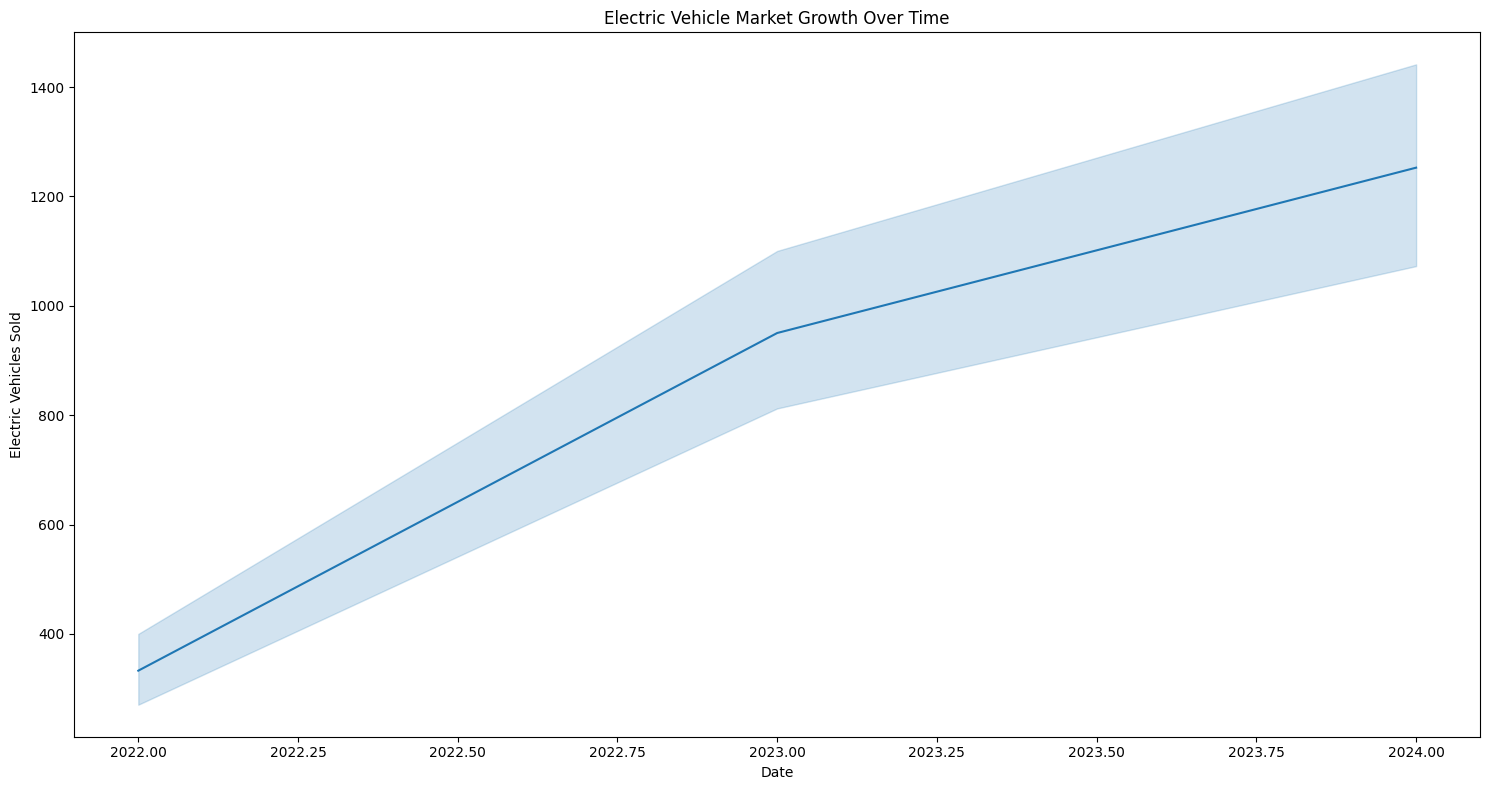

In [302]:
#line graph to show the ev market grwth
plt.figure(figsize=(15,8))
sns.lineplot(data=ev_state_data, x='fiscal_year', y='electric_vehicles_sold')
plt.title('Electric Vehicle Market Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Electric Vehicles Sold')
plt.tight_layout()
plt.show()

**State-wise and Vehicle Category-wise Trends:**

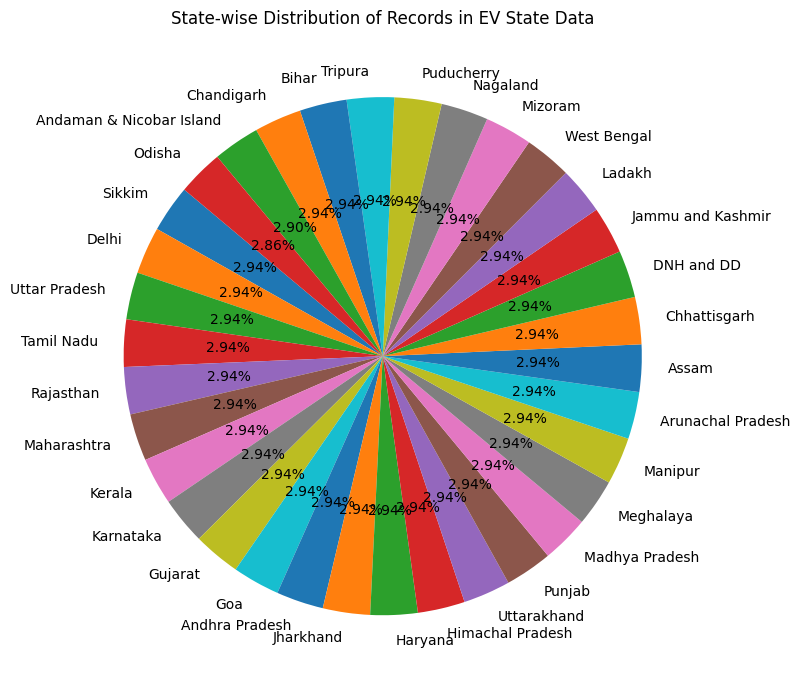

In [303]:
# Pie chart for the number of records per state
state_distribution = ev_state_data['state'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(state_distribution, labels=state_distribution.index, autopct='%1.2f%%', startangle=140)
plt.title('State-wise Distribution of Records in EV State Data')
plt.tight_layout()
plt.show()


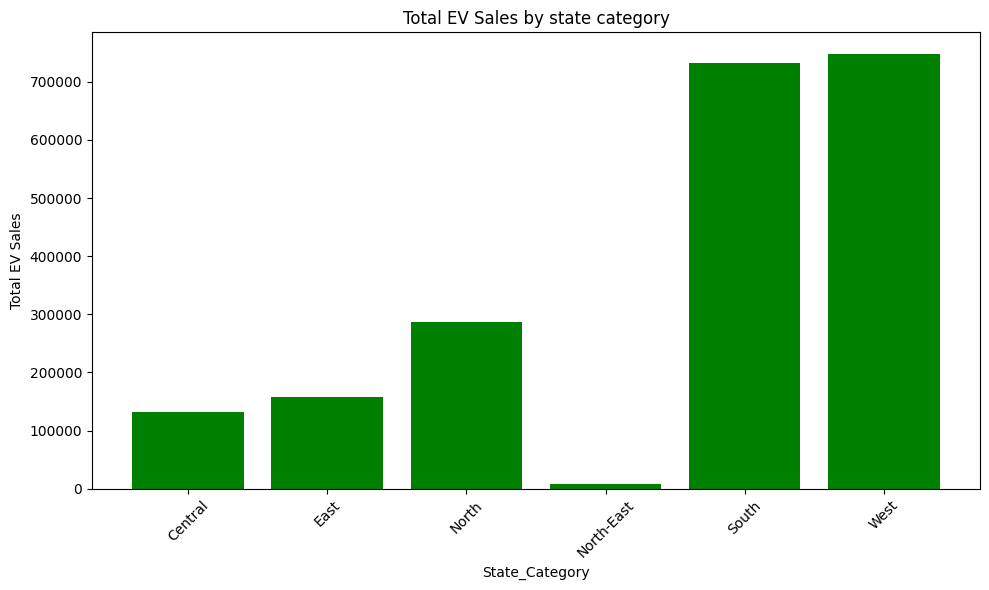

In [304]:
region_summary = ev_state_data.groupby('state_category')['electric_vehicles_sold'].sum().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(region_summary['state_category'], region_summary['electric_vehicles_sold'], color='green')
plt.xlabel('State_Category')
plt.ylabel('Total EV Sales')
plt.title('Total EV Sales by state category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




---


The West and South region has demonstrated the highest total EV sales among all regions, reflecting strong market demand and adoption.


---



In [305]:
#states in west and south region

print("West Region:",[i for i in ev_state_data[ev_state_data['state_category']=='West']['state'].unique()])
print(100*"-")
print("South Region:",[i for i in ev_state_data[ev_state_data['state_category']=='South']['state'].unique()])


West Region: ['DNH and DD', 'Goa', 'Gujarat', 'Maharashtra', 'Rajasthan']
----------------------------------------------------------------------------------------------------
South Region: ['Andaman & Nicobar Island', 'Puducherry', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu']


In [306]:
#Stacked Bar Chart of Vehicle Categories by Region
df_pivot = ev_state_data.pivot_table(index='state_category', columns='vehicle_category', values='electric_vehicles_sold', aggfunc='sum')


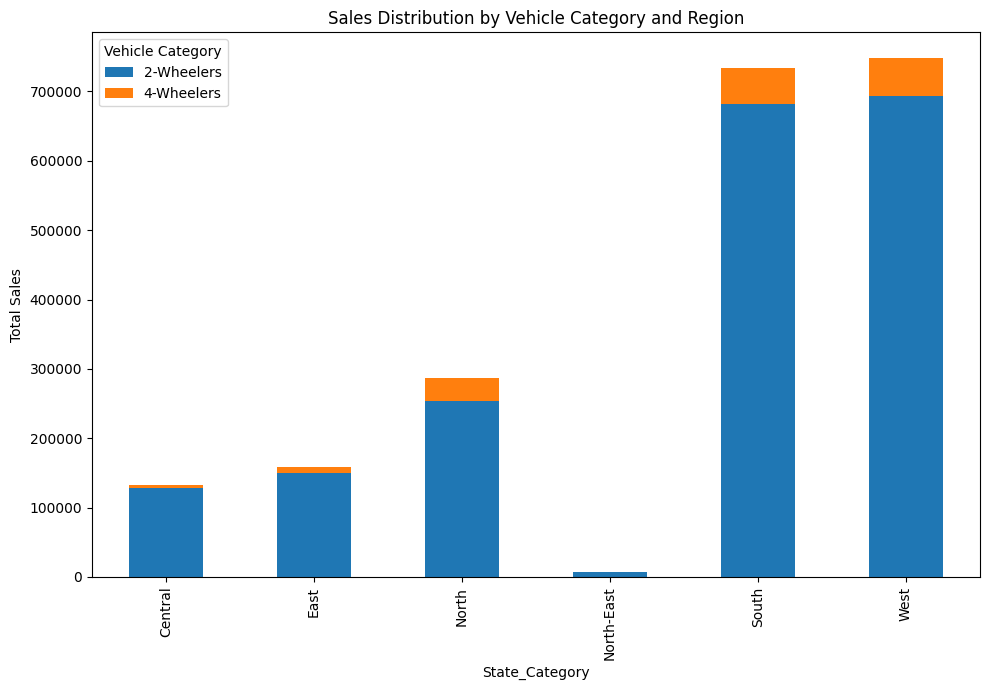

In [307]:

# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('State_Category')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Vehicle Category and Region')
plt.legend(title='Vehicle Category')
plt.tight_layout()

# Show the plot
plt.show()


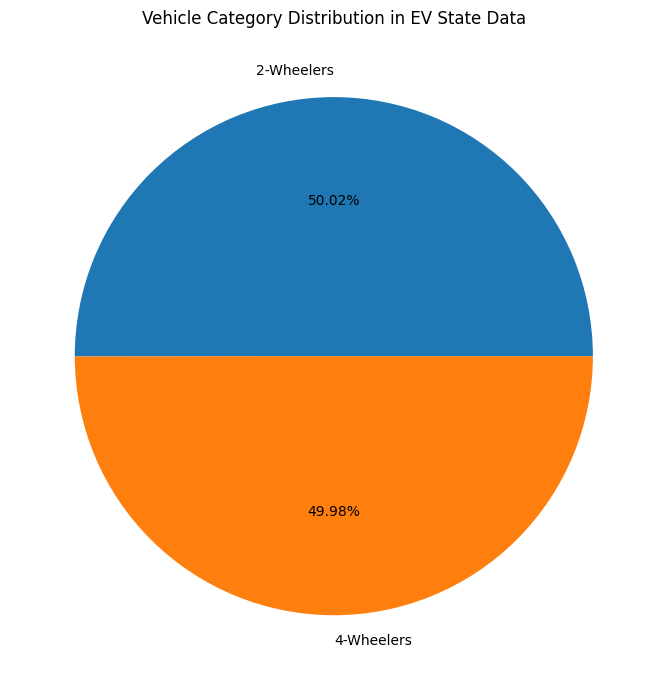

In [308]:
# Pie chart for the vehicle category distribution
vehicle_category_distribution = ev_state_data['vehicle_category'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(vehicle_category_distribution, labels=vehicle_category_distribution.index, autopct='%1.2f%%')
plt.title('Vehicle Category Distribution in EV State Data')
plt.tight_layout()
plt.show()


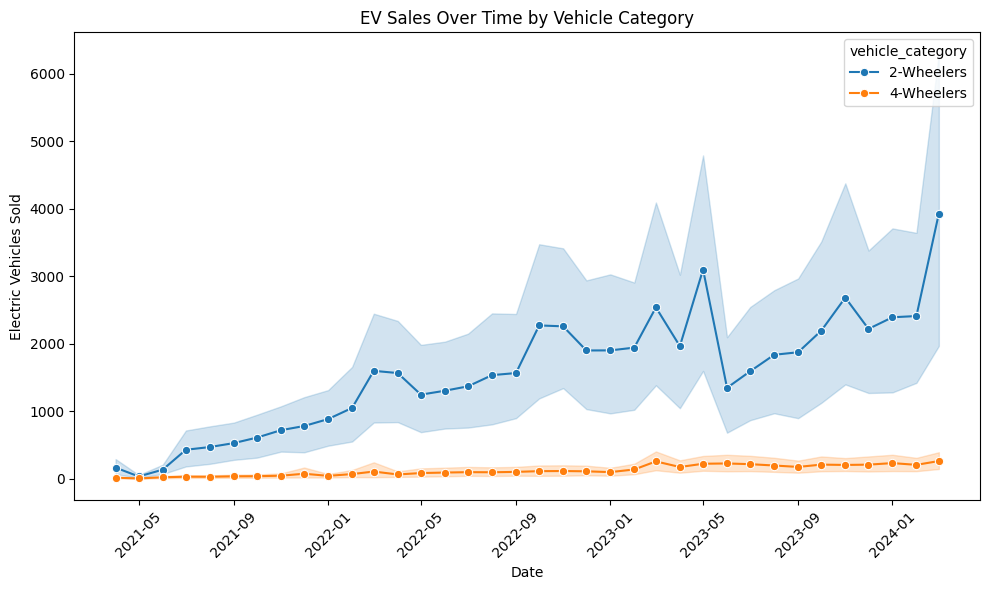

In [309]:
# Line plot to show the trend of EV sales over time, segmented by vehicle category
plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_state_data, x='date', y='electric_vehicles_sold', hue='vehicle_category', marker='o', palette='tab10')
plt.title('EV Sales Over Time by Vehicle Category')
plt.xlabel('Date')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


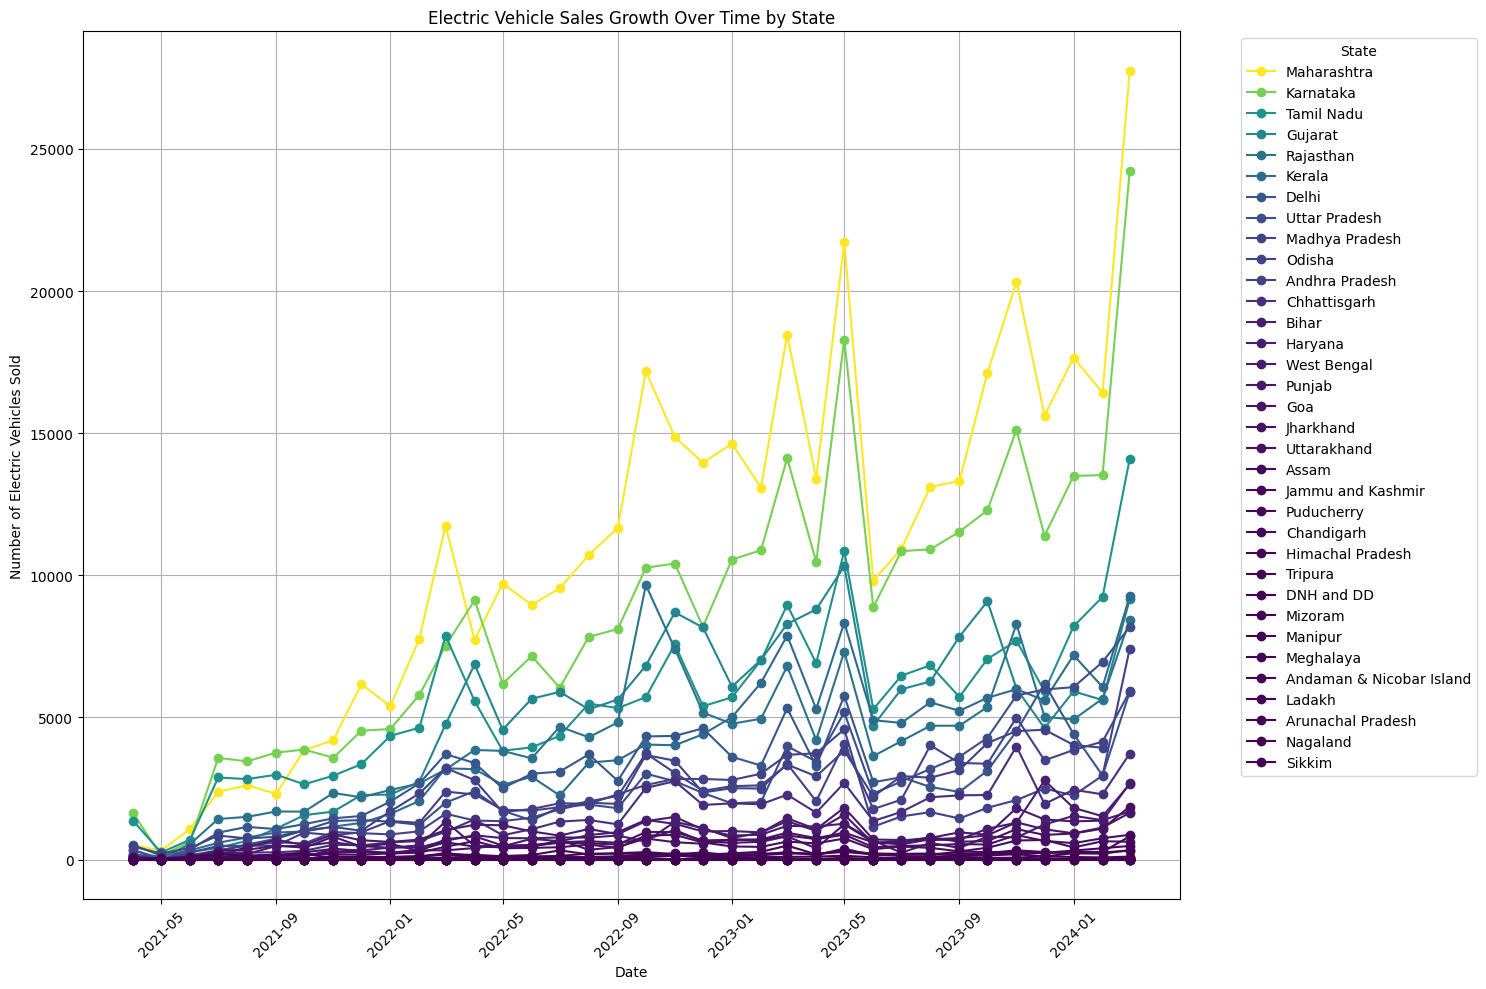

In [310]:

# Aggregate EV sales by date and state
state_growth = ev_state_data.groupby(['date', 'state'])['electric_vehicles_sold'].sum().unstack()

# Calculate total sales by state
total_sales = state_growth.sum()

# Sort states by total sales
sorted_states = total_sales.sort_values(ascending=False).index

# Define a colormap
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(total_sales.min(), total_sales.max())

# Plot line charts for each state with gradient color
plt.figure(figsize=(15, 10))
for state in sorted_states:
    color = cmap(norm(total_sales[state]))
    plt.plot(state_growth.index, state_growth[state], marker='o', label=state, color=color)

# Add title and labels
plt.title('Electric Vehicle Sales Growth Over Time by State')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles Sold')

# Add legend with colors in order of sales
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles = [handles[labels.index(state)] for state in sorted_states]
sorted_labels = [labels[labels.index(state)] for state in sorted_states]
plt.legend(sorted_handles, sorted_labels, title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




---


The line chart illustrates the growth trend of electric vehicle sales across different states over time. States with the highest sales are depicted in light colors, reflecting their significant contribution to the overall market growth.


---



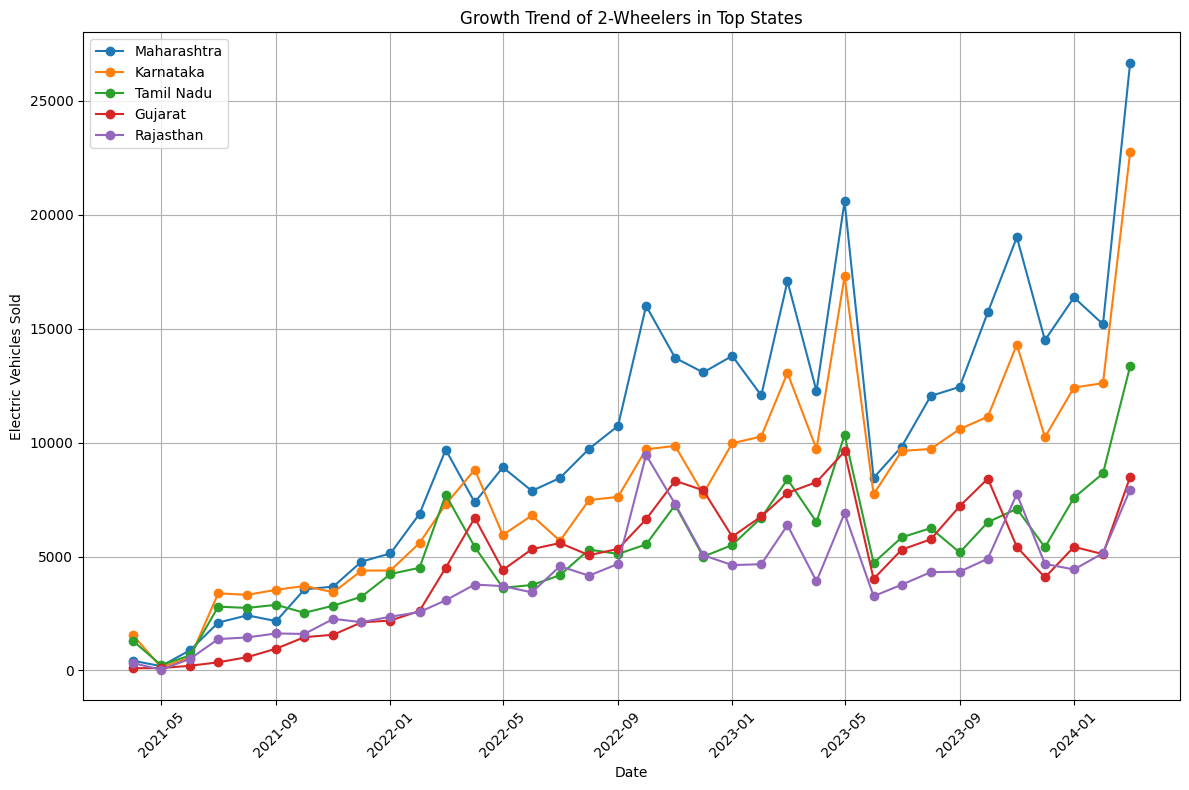

In [311]:

# Filter data for 2-wheelers
df_2wheelers = ev_state_data[ev_state_data['vehicle_category'] == '2-Wheelers']

# Group by state and aggregate total sales
state_sales_2wheelers = df_2wheelers.groupby('state')['electric_vehicles_sold'].sum()

# Identify the top states by sales of 2-wheelers
top_states_2wheelers = state_sales_2wheelers.nlargest(5).index

# Filter the original dataset to include only the top states
df_top_states = df_2wheelers[df_2wheelers['state'].isin(top_states_2wheelers)]

# Plot the growth trend for the top states
plt.figure(figsize=(12, 8))

for state in top_states_2wheelers:
    state_data = df_top_states[df_top_states['state'] == state]
    plt.plot(state_data['date'], state_data['electric_vehicles_sold'], marker='o', label=state)

plt.xlabel('Date')
plt.ylabel('Electric Vehicles Sold')
plt.title('Growth Trend of 2-Wheelers in Top States')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




---


From this visualization, we can understand that Maharashtra, Karnataka, Tamil Nadu, Gujarat, and Rajasthan are the top states in 2-wheeler electric vehicle sales.


---



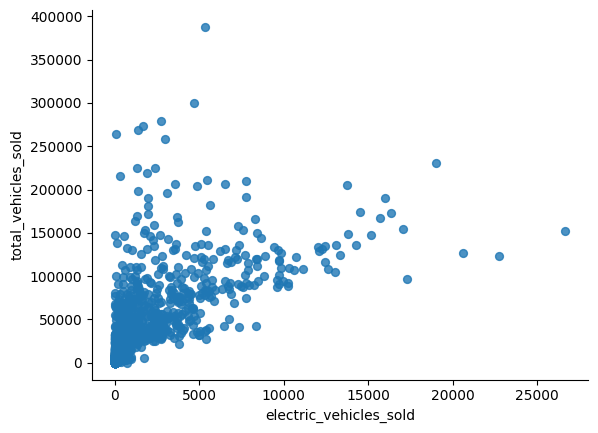

In [312]:
ev_state_data.plot(kind='scatter', x='electric_vehicles_sold', y='total_vehicles_sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

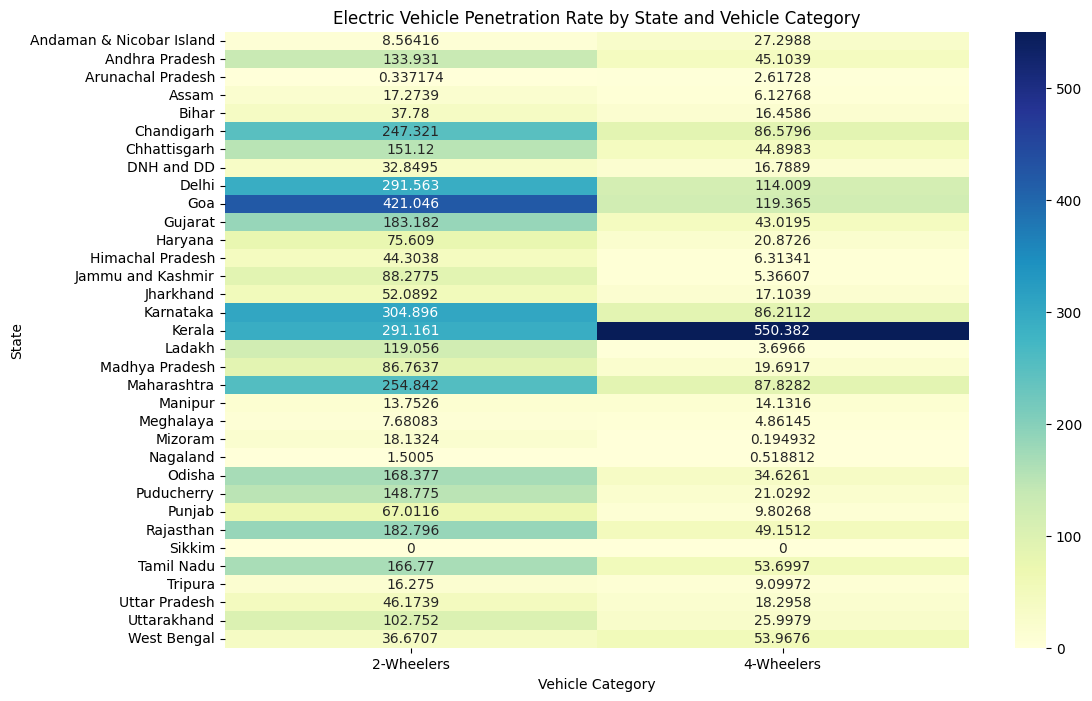

In [313]:

# Pivot table for state-wise and vehicle category sales
cross_analysis = ev_state_data.pivot_table(values='penetration_rate', index='state', columns='vehicle_category', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_analysis, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Electric Vehicle Penetration Rate by State and Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('State')
plt.show()


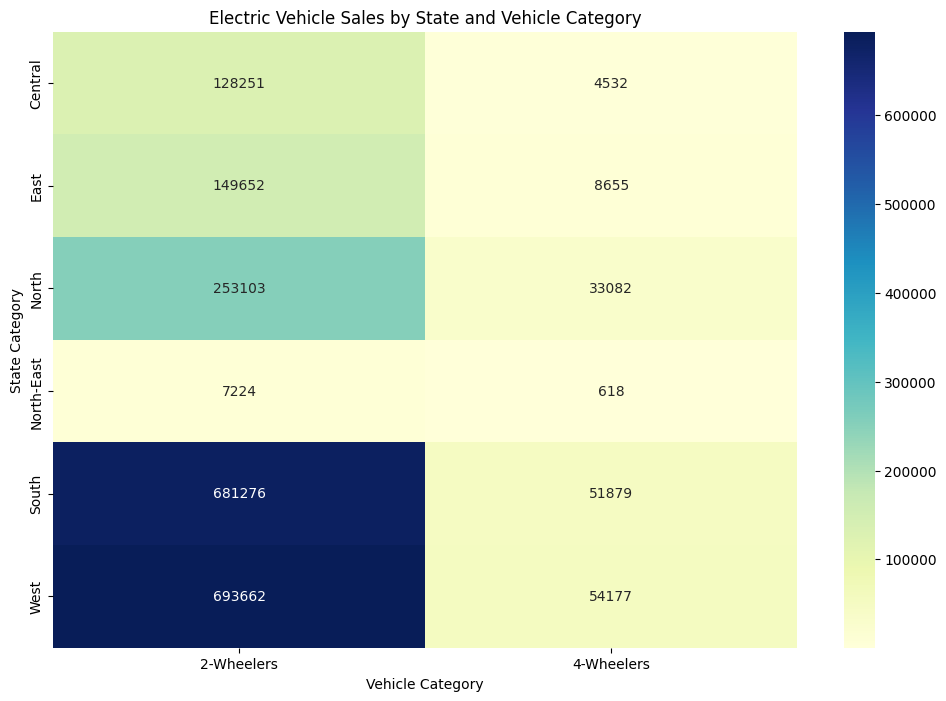

In [314]:

# Pivot table for state category-wise and vehicle category sales
cross_analysis = ev_state_data.pivot_table(values='electric_vehicles_sold', index='state_category', columns='vehicle_category', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_analysis, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Electric Vehicle Sales by State and Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('State Category')
plt.show()


**EV Makers Data Analysis**

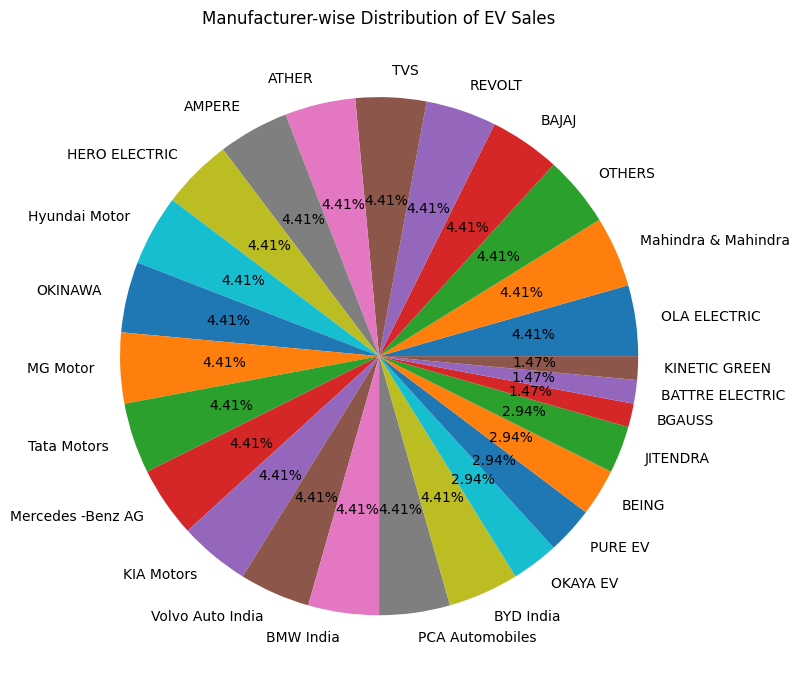

In [315]:
# Pie chart to show the distribution of sales across manufacturers
maker_distribution = ev_makers_data['maker'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(maker_distribution, labels=maker_distribution.index, autopct='%1.2f%%')
plt.title('Manufacturer-wise Distribution of EV Sales')
plt.tight_layout()
plt.show()


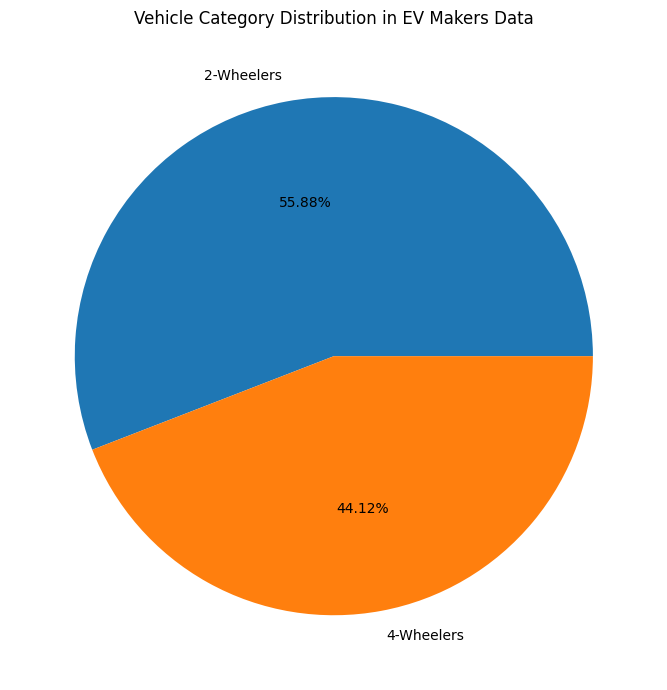

In [316]:
# Pie chart to show the distribution of vehicle categories across manufacturers
vehicle_category_maker_distribution = ev_makers_data['vehicle_category'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(vehicle_category_maker_distribution, labels=vehicle_category_maker_distribution.index, autopct='%1.2f%%')
plt.title('Vehicle Category Distribution in EV Makers Data')
plt.tight_layout()
plt.show()


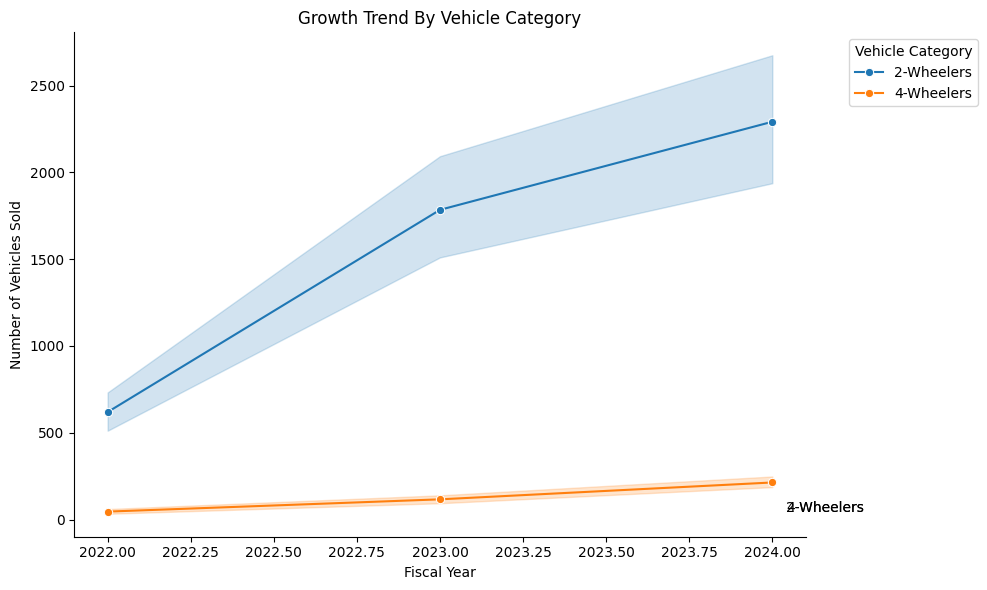

In [317]:
ev_state_data = ev_state_data.sort_values(by=['vehicle_category', 'fiscal_year'])


fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
sns.lineplot(data=ev_state_data, x='fiscal_year', y='electric_vehicles_sold',
             hue='vehicle_category', marker='o', palette='tab10', ax=ax)

# Labeling the axes
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Vehicles Sold")

# Annotate the last data point for each vehicle category
for category in ev_state_data['vehicle_category'].unique():
    category_data = ev_state_data[ev_state_data['vehicle_category'] == category]
    last_point = category_data.iloc[-1]
    plt.annotate(f"{category}",
                 (last_point['fiscal_year'], last_point['electric_vehicles_sold']),
                 textcoords="offset points",
                 xytext=(10, 5),
                 ha='left')

# Improve plot appearance
ax.spines[['right', 'top']].set_visible(False)
plt.legend(title='Vehicle Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Show plot
plt.title("Growth Trend By Vehicle Category")
plt.tight_layout()
plt.show()




---


The analysis reveals that 2-wheelers consistently outperform 4-wheelers in sales, with significantly higher numbers over time. This trend suggests a stronger market demand for 2-wheelers in the electric vehicle segment.


---



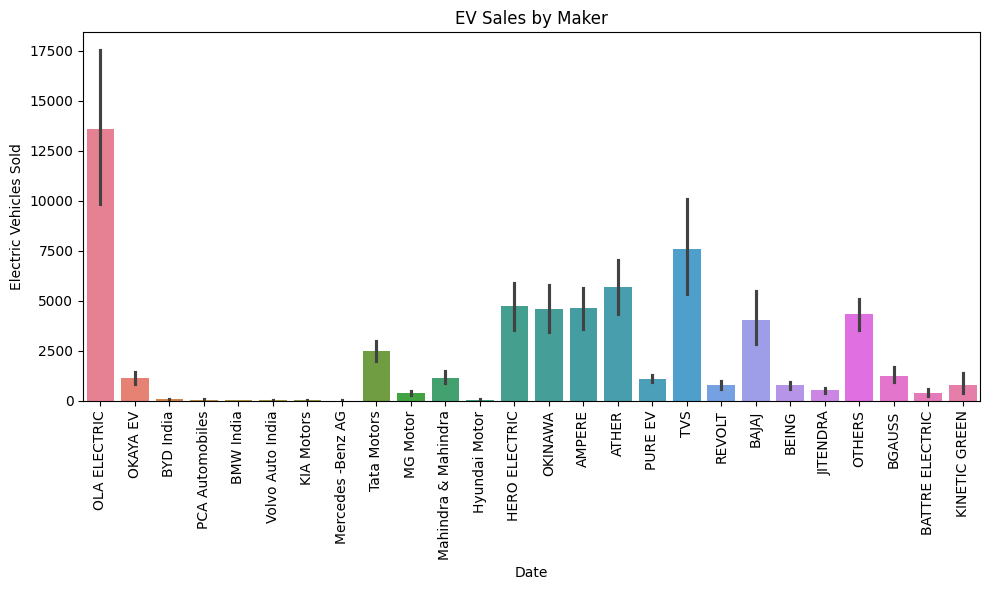

In [318]:
# bar plot to show the trend of EV sales over time, segmented by makers
plt.figure(figsize=(10, 6))
sns.barplot(data=ev_makers_data, x='maker', y='electric_vehicles_sold',palette='husl')
plt.title('EV Sales by Maker')
plt.xlabel('Date')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




---

Ola Electric, TVS, Ather and some other makers have the highest electric vehicle sales figures, leading the market compared to other makers. Their strong sales performance underscores their significant role and competitive edge in the electric vehicle industry.

---



### **Preparing Data For Clustering and PCA**

In [319]:
ev_state_data.keys()

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'state_category', 'fiscal_year', 'quarter',
       'penetration_rate'],
      dtype='object')

In [320]:
#encoding vehicle category
ev_state_data['vehicle_category']=ev_state_data['vehicle_category'].replace('2-Wheelers',2)
ev_state_data['vehicle_category']=ev_state_data['vehicle_category'].replace('4-Wheelers',4)

#encoding quarter
ev_state_data['quarter']=ev_state_data['quarter'].replace('Q1',1)
ev_state_data['quarter']=ev_state_data['quarter'].replace('Q2',2)
ev_state_data['quarter']=ev_state_data['quarter'].replace('Q3',3)
ev_state_data['quarter']=ev_state_data['quarter'].replace('Q4',4)

#encoding state_category
ev_state_data['state_category']=ev_state_data['state_category'].replace('Central',4)
ev_state_data['state_category']=ev_state_data['state_category'].replace('East',1)
ev_state_data['state_category']=ev_state_data['state_category'].replace('West',2)
ev_state_data['state_category']=ev_state_data['state_category'].replace('South',3)
ev_state_data['state_category']=ev_state_data['state_category'].replace('North',4)
ev_state_data['state_category']=ev_state_data['state_category'].replace('North-East',5)

In [321]:

ev_state_data.drop(columns=['date','fiscal_year'],inplace=True)

In [322]:
ev_state_data

,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,state_category,quarter,penetration_rate
0,Sikkim,2,0,398,5,1,0.000000
2,Sikkim,2,0,113,5,1,0.000000
4,Sikkim,2,0,229,5,1,0.000000
6,Sikkim,2,0,458,5,2,0.000000
8,Sikkim,2,0,489,5,2,0.000000
...,...,...,...,...,...,...,...
1442,Puducherry,4,5,1042,3,4,0.479846
1443,Meghalaya,4,3,1200,5,4,0.250000
1444,Himachal Pradesh,4,17,4147,4,4,0.409935
1445,DNH and DD,4,4,429,2,4,0.932401


In [323]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding
ev_state_data['state_encoded'] = label_encoder.fit_transform(ev_state_data['state'])

# Check the encoded values
ev_state_data[['state', 'state_encoded']].sort_values(by='state_encoded').drop_duplicates()


,state,state_encoded
330,Andaman & Nicobar Island,0
1335,Andhra Pradesh,1
342,Arunachal Pradesh,2
2152,Assam,3
767,Bihar,4
1139,Chandigarh,5
2068,Chhattisgarh,6
992,DNH and DD,7
2215,Delhi,8
623,Goa,9


In [324]:
data=ev_state_data.drop(['state','state_encoded'],axis=1)
data

,vehicle_category,electric_vehicles_sold,total_vehicles_sold,state_category,quarter,penetration_rate
0,2,0,398,5,1,0.000000
2,2,0,113,5,1,0.000000
4,2,0,229,5,1,0.000000
6,2,0,458,5,2,0.000000
8,2,0,489,5,2,0.000000
...,...,...,...,...,...,...
1442,4,5,1042,3,4,0.479846
1443,4,3,1200,5,4,0.250000
1444,4,17,4147,4,4,0.409935
1445,4,4,429,2,4,0.932401


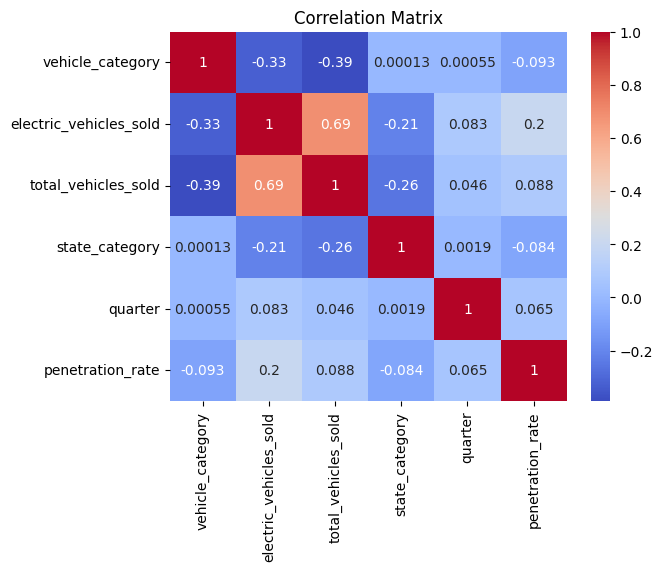

In [325]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Since total vehicles sold and electric vehicles sold has high correlation dropping total vehicles from data

In [326]:
data.drop('total_vehicles_sold',axis=1,inplace=True)
data.head()

,vehicle_category,electric_vehicles_sold,state_category,quarter,penetration_rate
0,2,0,5,1,0.0
2,2,0,5,1,0.0
4,2,0,5,1,0.0
6,2,0,5,2,0.0
8,2,0,5,2,0.0


###PCA


In [327]:
#converting data to a matrix
x=data.values

In [328]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [329]:
#Performing PCA
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
print(x.shape)

(2445, 5)


In [330]:
#finding standard deviation, proprtion of variance, cumulative proportion
std = np.round(np.sqrt(pca.explained_variance_), 3)
prop_var = np.round(pca.explained_variance_ratio_, 3)
cum_prop = np.round(np.cumsum(prop_var), 3)

print("Standard Deviation:", np.round(std, 3))
print("Proportion of Variance:", np.round(prop_var, 3))
print("Cumulative Proportion:", np.round(cum_prop, 3))

Standard Deviation: [1.229 1.006 1.001 0.941 0.77 ]
Proportion of Variance: [0.302 0.202 0.2   0.177 0.119]
Cumulative Proportion: [0.302 0.504 0.704 0.881 1.   ]


In [331]:
pca_df = pd.DataFrame(x, columns=[f'PC{i+1}' for i in range(x.shape[1])])


In [332]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.477760,-1.748915,-0.932056,0.524467,-0.206588
1,-0.477760,-1.748915,-0.932056,0.524467,-0.206588
2,-0.477760,-1.748915,-0.932056,0.524467,-0.206588
3,-0.335793,-1.003986,-1.266718,0.207953,-0.322918
4,-0.335793,-1.003986,-1.266718,0.207953,-0.322918


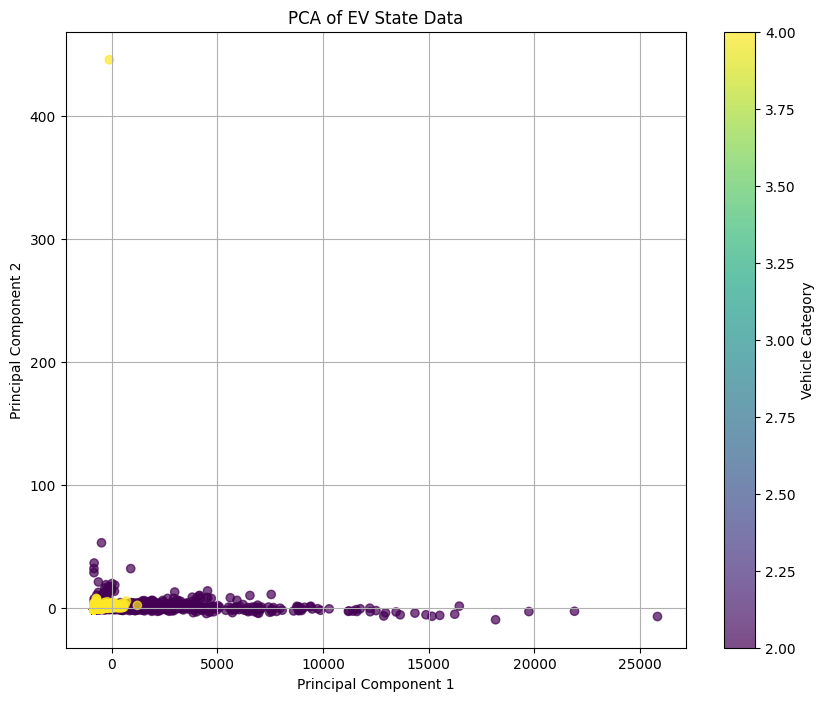

Explained Variance Ratio by Component: [9.99980527e-01 1.86862857e-05]
Cumulative Explained Variance Ratio: [0.99998053 0.99999921]


In [333]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['state_category'] = ev_state_data['state_category']

# Plot PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=ev_state_data['vehicle_category'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Vehicle Category')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of EV State Data')
plt.grid(True)
plt.show()

# Print explained variance ratios
print("Explained Variance Ratio by Component:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))




---


The PCA analysis reveals that the first principal component explains 99.99% of the variance in EV sales data, with the second component adding only 0.18%. This indicates that nearly all of the variability in the dataset can be captured by a single dimension. As a result, further dimensions contribute minimally to understanding the differences between regions or vehicle categories.

---



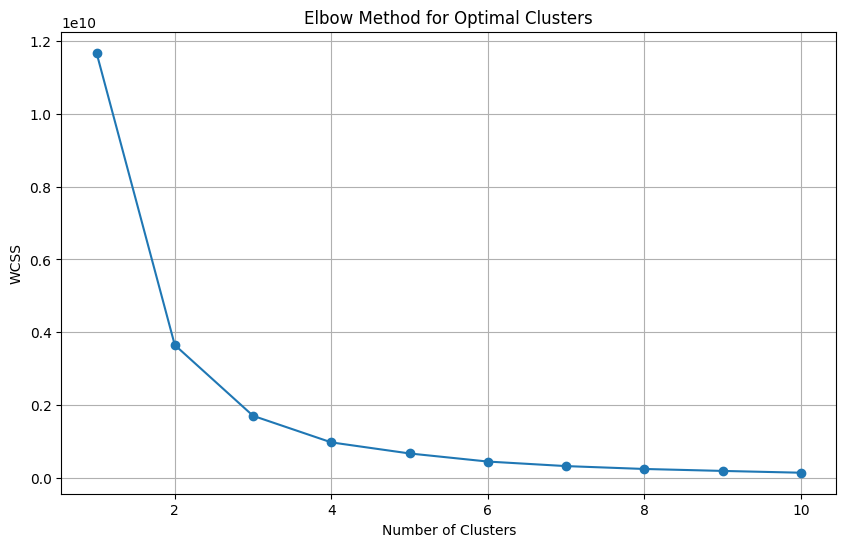

In [334]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


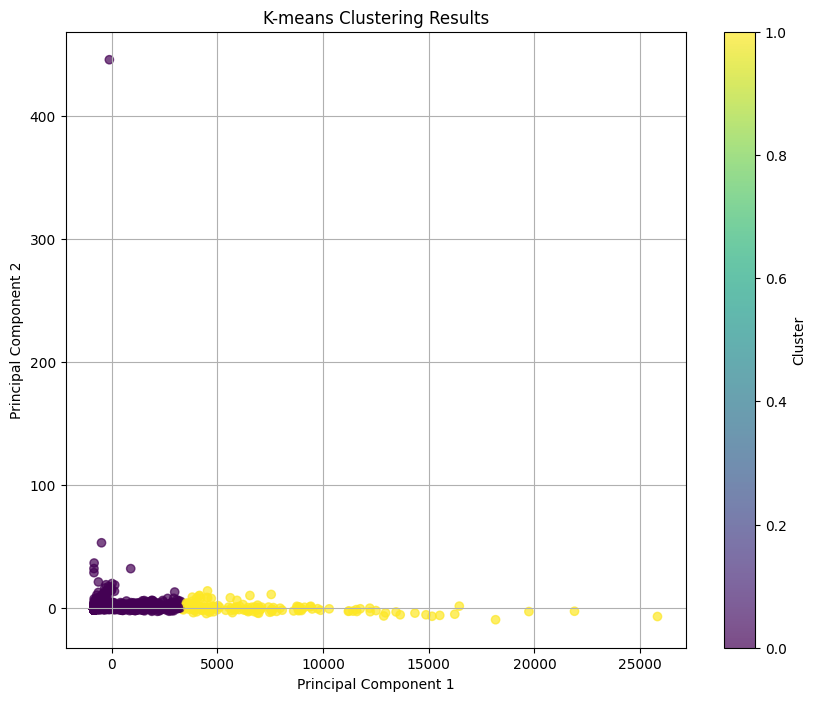

In [335]:
# Apply K-means with optimal number of clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(pca_result)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results')
plt.grid(True)
plt.show()


In [336]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_result, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.8789830436703988


In [337]:
# Combine original data with cluster labels
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters

# Analyze each cluster
cluster_summary = data_with_clusters.groupby('Cluster').mean()
cluster_summary['Count'] = data_with_clusters['Cluster'].value_counts()



In [338]:
cluster_profile = data_with_clusters.groupby('Cluster').agg({
    'electric_vehicles_sold': 'mean',
    'penetration_rate': 'mean',
    'state_category': 'unique'
})

# Calculate the proportion of 2-Wheelers and 4-Wheelers in each cluster
vehicle_category_profile = data_with_clusters.groupby(['Cluster', 'vehicle_category']).size().unstack(fill_value=0)
vehicle_category_profile = vehicle_category_profile.apply(lambda x: x / x.sum(), axis=1)

# Merge the vehicle category proportions into the cluster profile
cluster_profile = pd.concat([cluster_profile, vehicle_category_profile], axis=1)

print(cluster_profile)


         electric_vehicles_sold  penetration_rate   state_category         2  \
Cluster                                                                        
0                    382.072767          1.836291  [5, 3, 4, 2, 1]  0.467538   
1                   7928.360000          8.129692     [3, 2, 4, 1]  1.000000   

                4  
Cluster            
0        0.532462  
1        0.000000  


In [339]:
# Display cluster summary for interpretation
print(cluster_profile)

         electric_vehicles_sold  penetration_rate   state_category         2  \
Cluster                                                                        
0                    382.072767          1.836291  [5, 3, 4, 2, 1]  0.467538   
1                   7928.360000          8.129692     [3, 2, 4, 1]  1.000000   

                4  
Cluster            
0        0.532462  
1        0.000000  




---


Cluster 0: Low EV sales (382.07) and penetration (1.83%), balanced 2-wheeler (46%) and 4-wheeler (53%) demand, representing early adoption across regions.

Cluster 1: High EV sales (7,928) and penetration (8.12%), entirely 2-wheeler focused, indicating **strong market development**.


---



####**Heatmap of Electric Vehicle Sales by Cluster and State**



In [340]:
data_with_clusters

,vehicle_category,electric_vehicles_sold,state_category,quarter,penetration_rate,Cluster
0,2,0,5,1,0.000000,0
2,2,0,5,1,0.000000,0
4,2,0,5,1,0.000000,0
6,2,0,5,2,0.000000,0
8,2,0,5,2,0.000000,0
...,...,...,...,...,...,...
1442,4,5,3,4,0.479846,0
1443,4,3,5,4,0.250000,0
1444,4,17,4,4,0.409935,0
1445,4,4,2,4,0.932401,0


In [341]:
import pandas as pd

# Merge the cluster labels with the original data on index or a common key
ev_state_data_with_clusters = ev_state_data.copy()
ev_state_data_with_clusters['Cluster'] = clusters

# Check the result
print(ev_state_data_with_clusters.head())


    state  vehicle_category  electric_vehicles_sold  total_vehicles_sold  \
0  Sikkim                 2                       0                  398   
2  Sikkim                 2                       0                  113   
4  Sikkim                 2                       0                  229   
6  Sikkim                 2                       0                  458   
8  Sikkim                 2                       0                  489   

   state_category  quarter  penetration_rate  state_encoded  Cluster  
0               5        1               0.0             28        0  
2               5        1               0.0             28        0  
4               5        1               0.0             28        0  
6               5        2               0.0             28        0  
8               5        2               0.0             28        0  


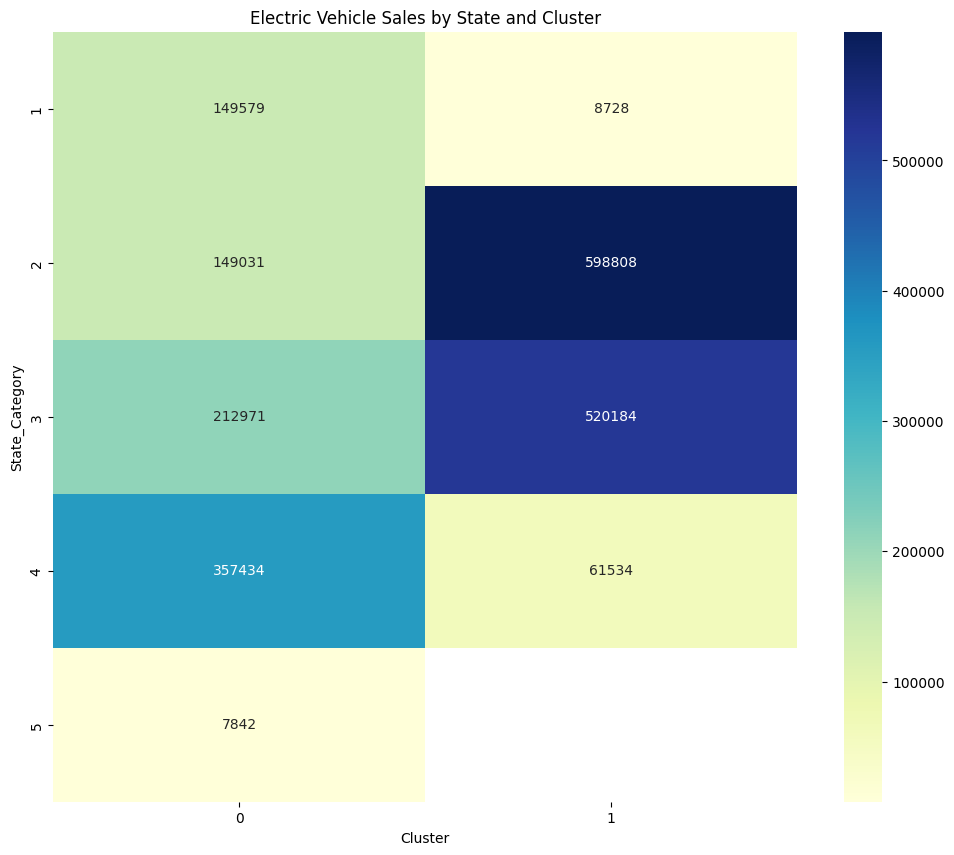

In [342]:

# Pivot table for sales by state and cluster
sales_heatmap_data = ev_state_data_with_clusters.pivot_table(values='electric_vehicles_sold', index='state_category', columns='Cluster', aggfunc='sum')

plt.figure(figsize=(12, 10))
sns.heatmap(sales_heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Electric Vehicle Sales by State and Cluster')
plt.xlabel('Cluster')
plt.ylabel('State_Category')
plt.show()


####**Heatmap of Penetration Rates by Cluster and State**

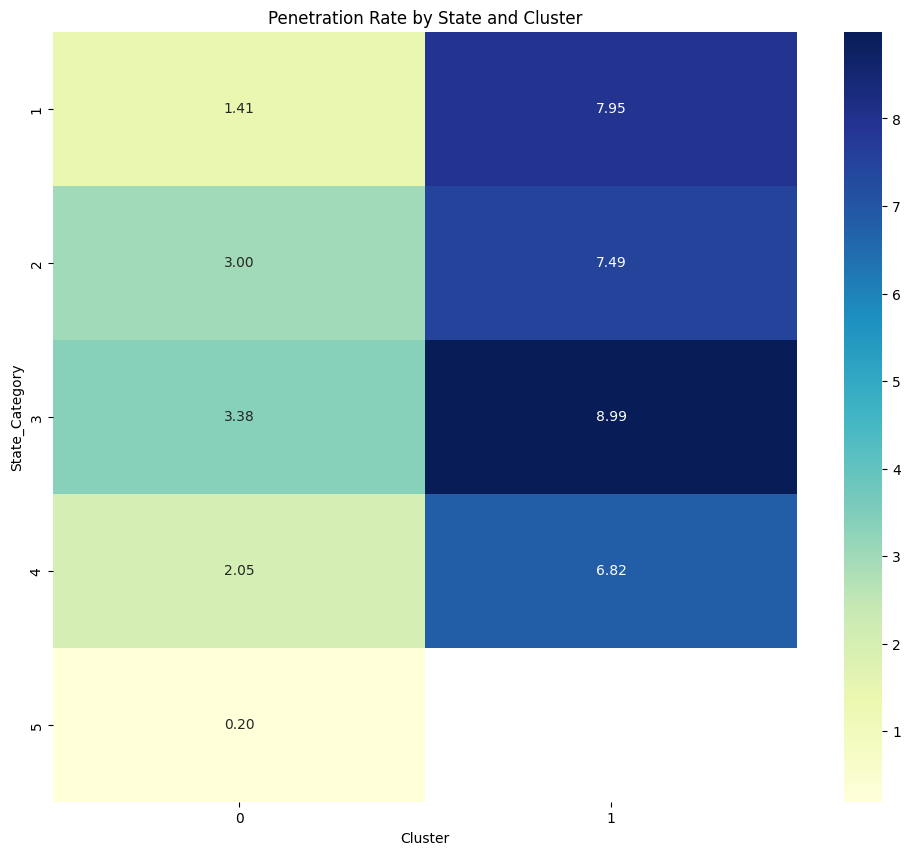

In [343]:
# Pivot table for penetration rate by state and cluster
penetration_heatmap_data = ev_state_data_with_clusters.pivot_table(values='penetration_rate', index='state_category', columns='Cluster', aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(penetration_heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Penetration Rate by State and Cluster')
plt.xlabel('Cluster')
plt.ylabel('State_Category')
plt.show()




---


 High penetration rates in specific states within Cluster 1 can highlight regions with successful adoption. In contrast, lower penetration rates in Clusters 0 can indicate areas with potential for increased marketing and sales efforts.


---



####**Total Sales by Cluster**

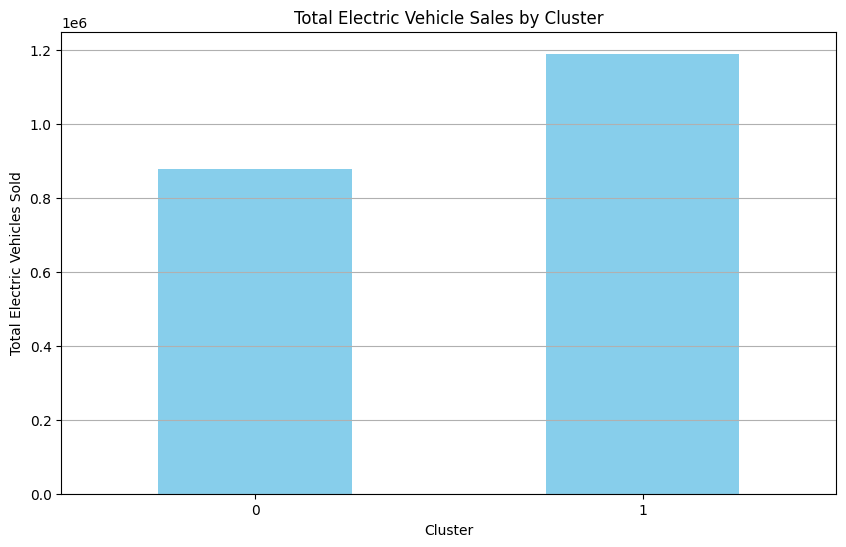

In [344]:
cluster_sales = data_with_clusters.groupby('Cluster')['electric_vehicles_sold'].sum()

plt.figure(figsize=(10, 6))
cluster_sales.plot(kind='bar', color='skyblue')
plt.title('Total Electric Vehicle Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Electric Vehicles Sold')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


####**Penetration Rate by Cluster**

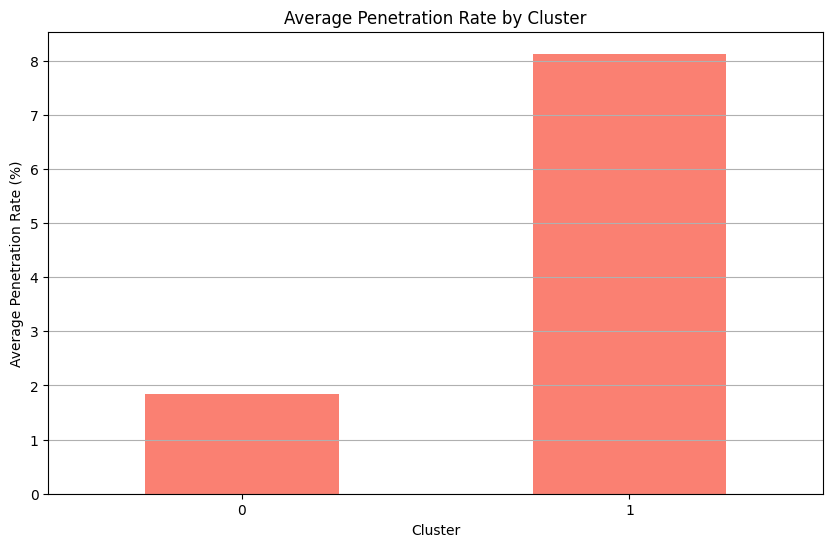

In [345]:
cluster_penetration = data_with_clusters.groupby('Cluster')['penetration_rate'].mean()

plt.figure(figsize=(10, 6))
cluster_penetration.plot(kind='bar', color='salmon')
plt.title('Average Penetration Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Penetration Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()




---


The bar chart displays the average penetration rate of electric vehicles in each cluster. Cluster 1 has the highest penetration rate, indicating a stronger presence of EVs in the markets within this cluster. Clusters 0 have lower penetration rate, suggesting either less adoption or more room for growth in these areas.


---



####**Vehicle Category Distribution by Cluster**

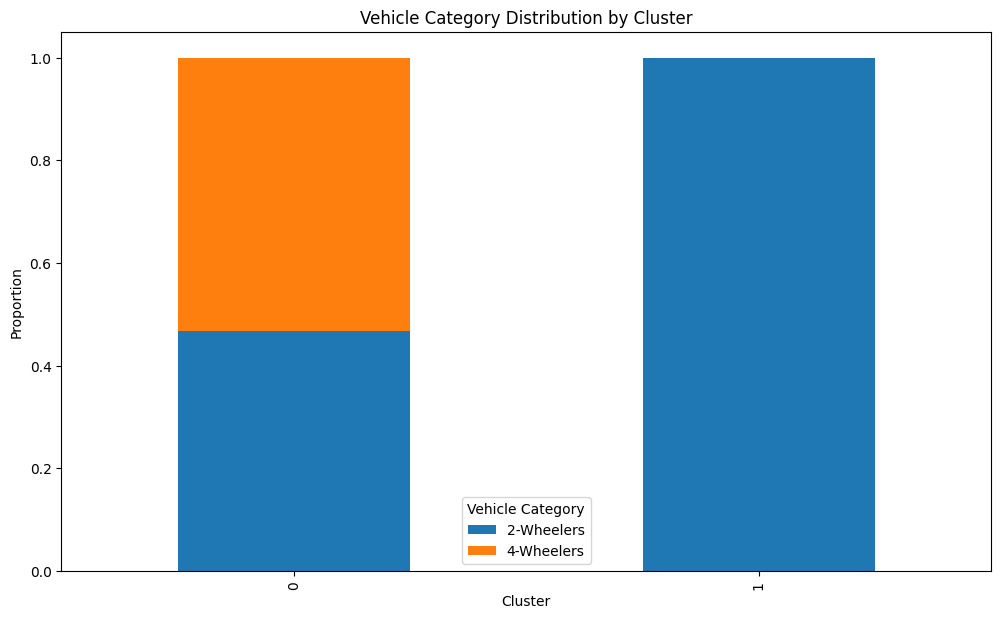

In [346]:
vehicle_category_profile.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#1f77b4', '#ff7f0e'])
plt.title('Vehicle Category Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Vehicle Category', labels=['2-Wheelers', '4-Wheelers'])
plt.show()




---


Cluster 1 shows a higher concentration of 2-wheelers, indicating strong demand for this category.


---



In [347]:
print(ev_state_data_with_clusters['state'].loc[ev_state_data_with_clusters['Cluster']==1].unique())

['Karnataka' 'Maharashtra' 'Tamil Nadu' 'Gujarat' 'Rajasthan' 'Kerala'
 'Andhra Pradesh' 'Delhi' 'Uttar Pradesh' 'Madhya Pradesh' 'Odisha']


### **Strategic Target Regions for EV Market Expansion in India**

Index(['ST_NAME', 'geometry'], dtype='object')


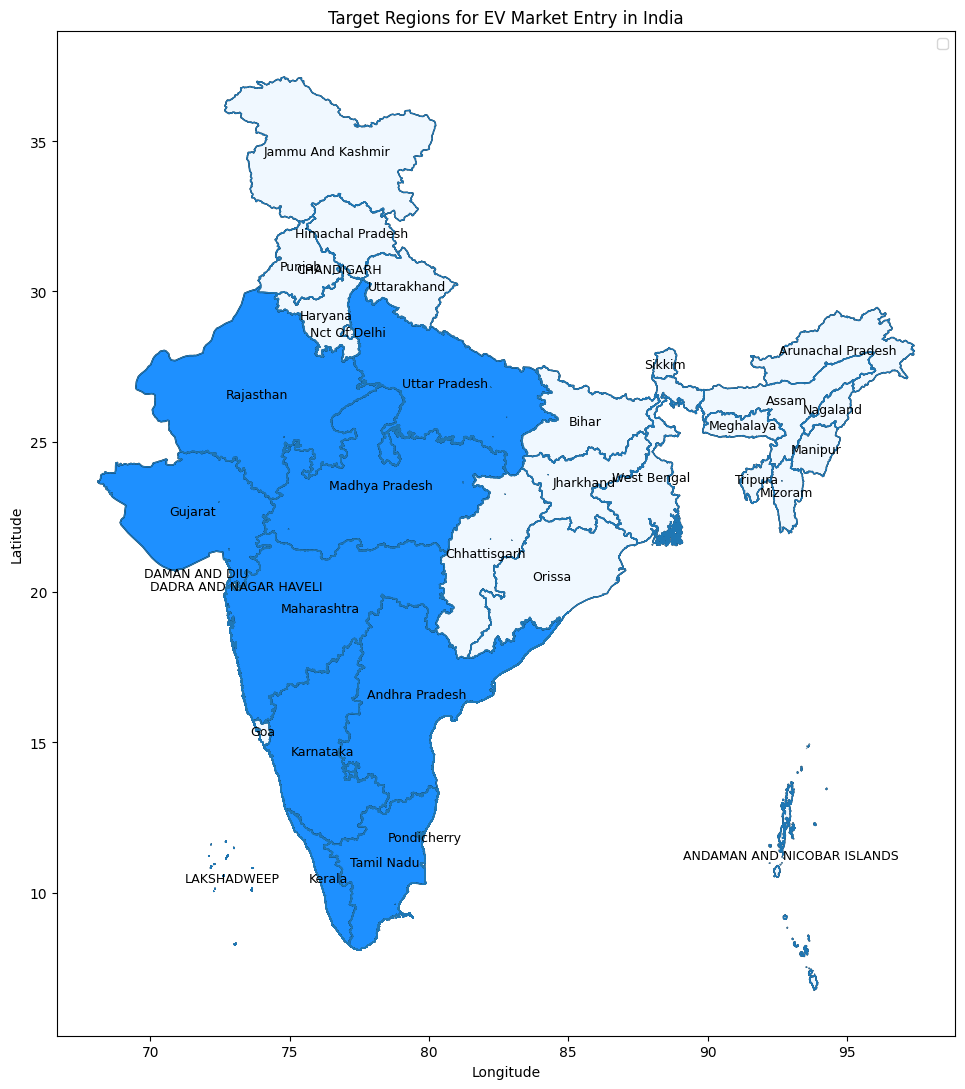

In [348]:
import geopandas as gpd

# Load India shapefile (replace 'path_to_shapefile' with the actual path)
india_map = gpd.read_file('/content/INDIA.shp')

# Your data for target regions
state_categories = {
    'Maharashtra': 'Target',
    'Karnataka': 'Target',
    'Tamil Nadu': 'Target',
    'Gujarat': 'Target',
    'Rajasthan': 'Target',
    'Uttar Pradesh': 'Target',
    'Madhya Pradesh': 'Target',
    'Andhra Pradesh': 'Target',
    'Kerala': 'Target',
    'Delhi': 'Target',
    'Odisha': 'Target'
}

# Ensure the column name in your shapefile matches
# For example, replace 'state_name' with the actual column name if different
# Check the column names in your shapefile
print(india_map.columns)

# Add a column for target regions
india_map['target'] = india_map['ST_NAME'].map(state_categories)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(16,11))
india_map.boundary.plot(ax=ax, linewidth=1)
india_map[india_map['target'] == 'Target'].plot(ax=ax, color='#1e90ff', edgecolor='black', label='Target Regions')
india_map[india_map['target'] != 'Target'].plot(ax=ax, color='#f0f8ff', edgecolor='black', label='Other Regions')

for idx, row in india_map.iterrows():
    state_name = row['ST_NAME']  # Replace 'state_name' with the actual column name for state names
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(x, y, state_name, fontsize=9, ha='center', va='center', color='black', weight='normal')

plt.title('Target Regions for EV Market Entry in India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.legend()
plt.show()




---
This map highlights key states identified as strategic targets for expanding the electric vehicle market in India. The selected regions, marked in vibrant color, represent high-potential areas for market entry and growth.









---



### **Detailed cluster profiling**

In [349]:
# Detailed cluster profiling
cluster_profile = data_with_clusters.groupby('Cluster').agg({
    'electric_vehicles_sold': 'mean',
    'penetration_rate': 'mean',
    'vehicle_category': 'mean',
    'state_category': lambda x: list(x.unique())  # Collect unique state categories
})

cluster_profile['Count'] = data_with_clusters['Cluster'].value_counts()

# Merge vehicle category proportions
vehicle_category_profile = data_with_clusters.groupby(['Cluster', 'vehicle_category']).size().unstack(fill_value=0)
vehicle_category_profile = vehicle_category_profile.apply(lambda x: x / x.sum(), axis=1)
cluster_profile = pd.concat([cluster_profile, vehicle_category_profile], axis=1)

print(cluster_profile)


         electric_vehicles_sold  penetration_rate  vehicle_category  \
Cluster                                                               
0                    382.072767          1.836291          3.064924   
1                   7928.360000          8.129692          2.000000   

          state_category  Count         2         4  
Cluster                                              
0        [5, 3, 4, 2, 1]   2295  0.467538  0.532462  
1           [3, 2, 4, 1]    150  1.000000  0.000000  




---

Cluster 1 exhibits higher total electric vehicle sales and penetration rates compared to Cluster 0, reflecting a stronger market presence. In Cluster 0, the sales are lower with a more balanced vehicle category distribution, while Cluster 1 shows a strong focus on 2-wheelers and minimal 4-wheeler sales.


---



In [350]:
# Add a dummy column to both DataFrames
ev_state_data_with_clusters['key'] = 0
date_data['key'] = 0

# Merge DataFrames using the dummy key
ev_state_data_with_clusters = pd.merge(ev_state_data_with_clusters, date_data, on='key').drop('key', axis=1)

In [351]:
ev_state_data_with_clusters

,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,state_category,quarter_x,penetration_rate,state_encoded,Cluster,date,fiscal_year,quarter_y
0,Sikkim,2,0,398,5,1,0.000000,28,0,2021-04-01,2022,Q1
1,Sikkim,2,0,398,5,1,0.000000,28,0,2021-05-01,2022,Q1
2,Sikkim,2,0,398,5,1,0.000000,28,0,2021-06-01,2022,Q1
3,Sikkim,2,0,398,5,1,0.000000,28,0,2021-07-01,2022,Q2
4,Sikkim,2,0,398,5,1,0.000000,28,0,2021-08-01,2022,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
88015,Manipur,4,2,370,5,4,0.540541,20,0,2023-11-01,2024,Q3
88016,Manipur,4,2,370,5,4,0.540541,20,0,2023-12-01,2024,Q3
88017,Manipur,4,2,370,5,4,0.540541,20,0,2024-01-01,2024,Q4
88018,Manipur,4,2,370,5,4,0.540541,20,0,2024-02-01,2024,Q4


### **Forecasting EV sales**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4nwq24tz/xhx2zu48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4nwq24tz/637dz_60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87894', 'data', 'file=/tmp/tmp4nwq24tz/xhx2zu48.json', 'init=/tmp/tmp4nwq24tz/637dz_60.json', 'output', 'file=/tmp/tmp4nwq24tz/prophet_modelbze0o5gi/prophet_model-20240913070959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


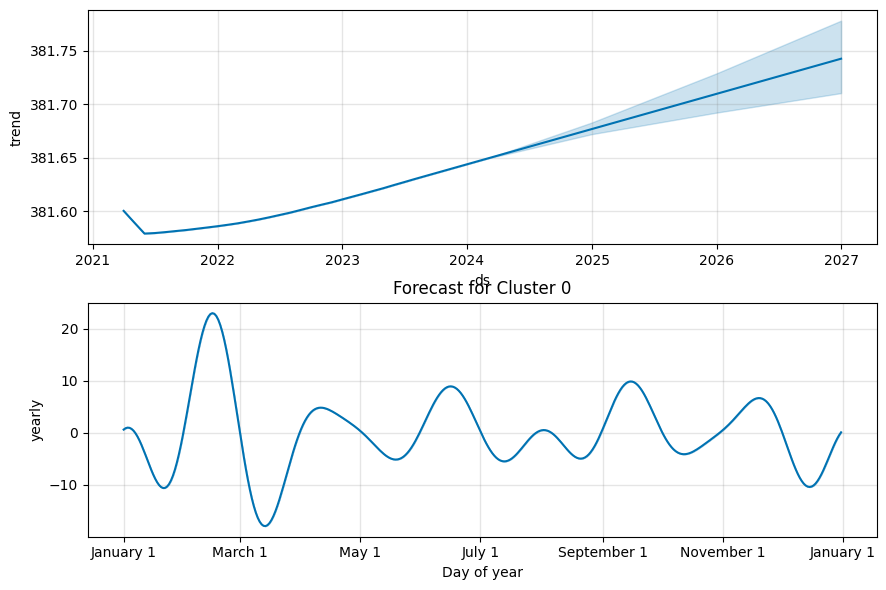

In [352]:
from prophet import Prophet

selected_cluster_data = ev_state_data_with_clusters[ev_state_data_with_clusters['Cluster'] == 0]

# Prepare data for Prophet
forecast_data = selected_cluster_data[['date', 'electric_vehicles_sold']].copy()
forecast_data = forecast_data.rename(columns={'date': 'ds', 'electric_vehicles_sold': 'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(forecast_data)

# Create future dataframe
future = model.make_future_dataframe(periods=3, freq='Y')

# Generate forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot_components(forecast)
plt.title('Forecast for Cluster 0')
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4nwq24tz/lq50py0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4nwq24tz/y601ejlj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17615', 'data', 'file=/tmp/tmp4nwq24tz/lq50py0b.json', 'init=/tmp/tmp4nwq24tz/y601ejlj.json', 'output', 'file=/tmp/tmp4nwq24tz/prophet_modelx2etl7o7/prophet_model-20240913071007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


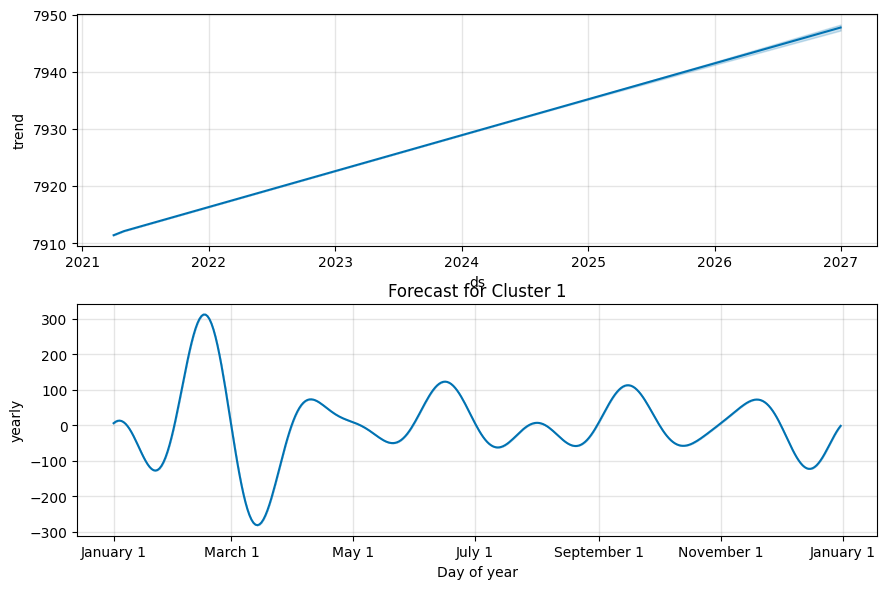

In [353]:
from prophet import Prophet

selected_cluster_data = ev_state_data_with_clusters[ev_state_data_with_clusters['Cluster'] == 1]

# Prepare data for Prophet
forecast_data = selected_cluster_data[['date', 'electric_vehicles_sold']].copy()
forecast_data = forecast_data.rename(columns={'date': 'ds', 'electric_vehicles_sold': 'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(forecast_data)

# Create future dataframe
future = model.make_future_dataframe(periods=3, freq='Y')

# Generate forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot_components(forecast)
plt.title('Forecast for Cluster 1')
plt.show()
